# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [2]:
!pip install --upgrade seaborn
!pip install --upgrade pandas



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# STEP #2: IMPORT DATASET

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('FuelEconomy.csv')
df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [8]:
df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [9]:
df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

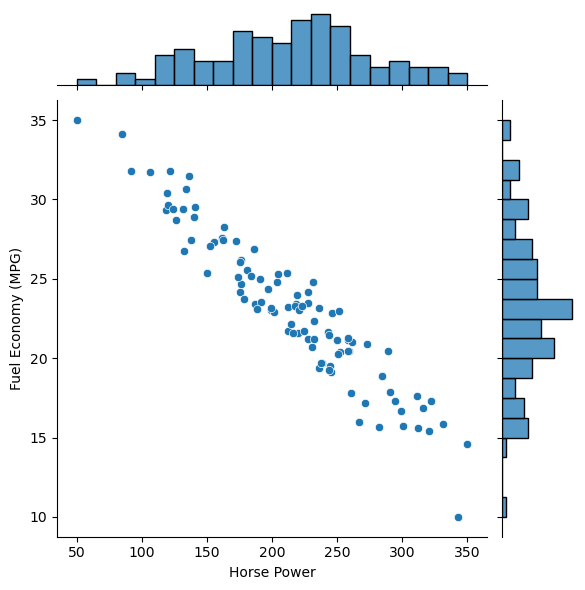

In [20]:
sns.jointplot(
    df, 
    x='Horse Power', 
    y='Fuel Economy (MPG)',
    kind = 'scatter', 
    marginal_kws = dict(bins=20, fill=True))



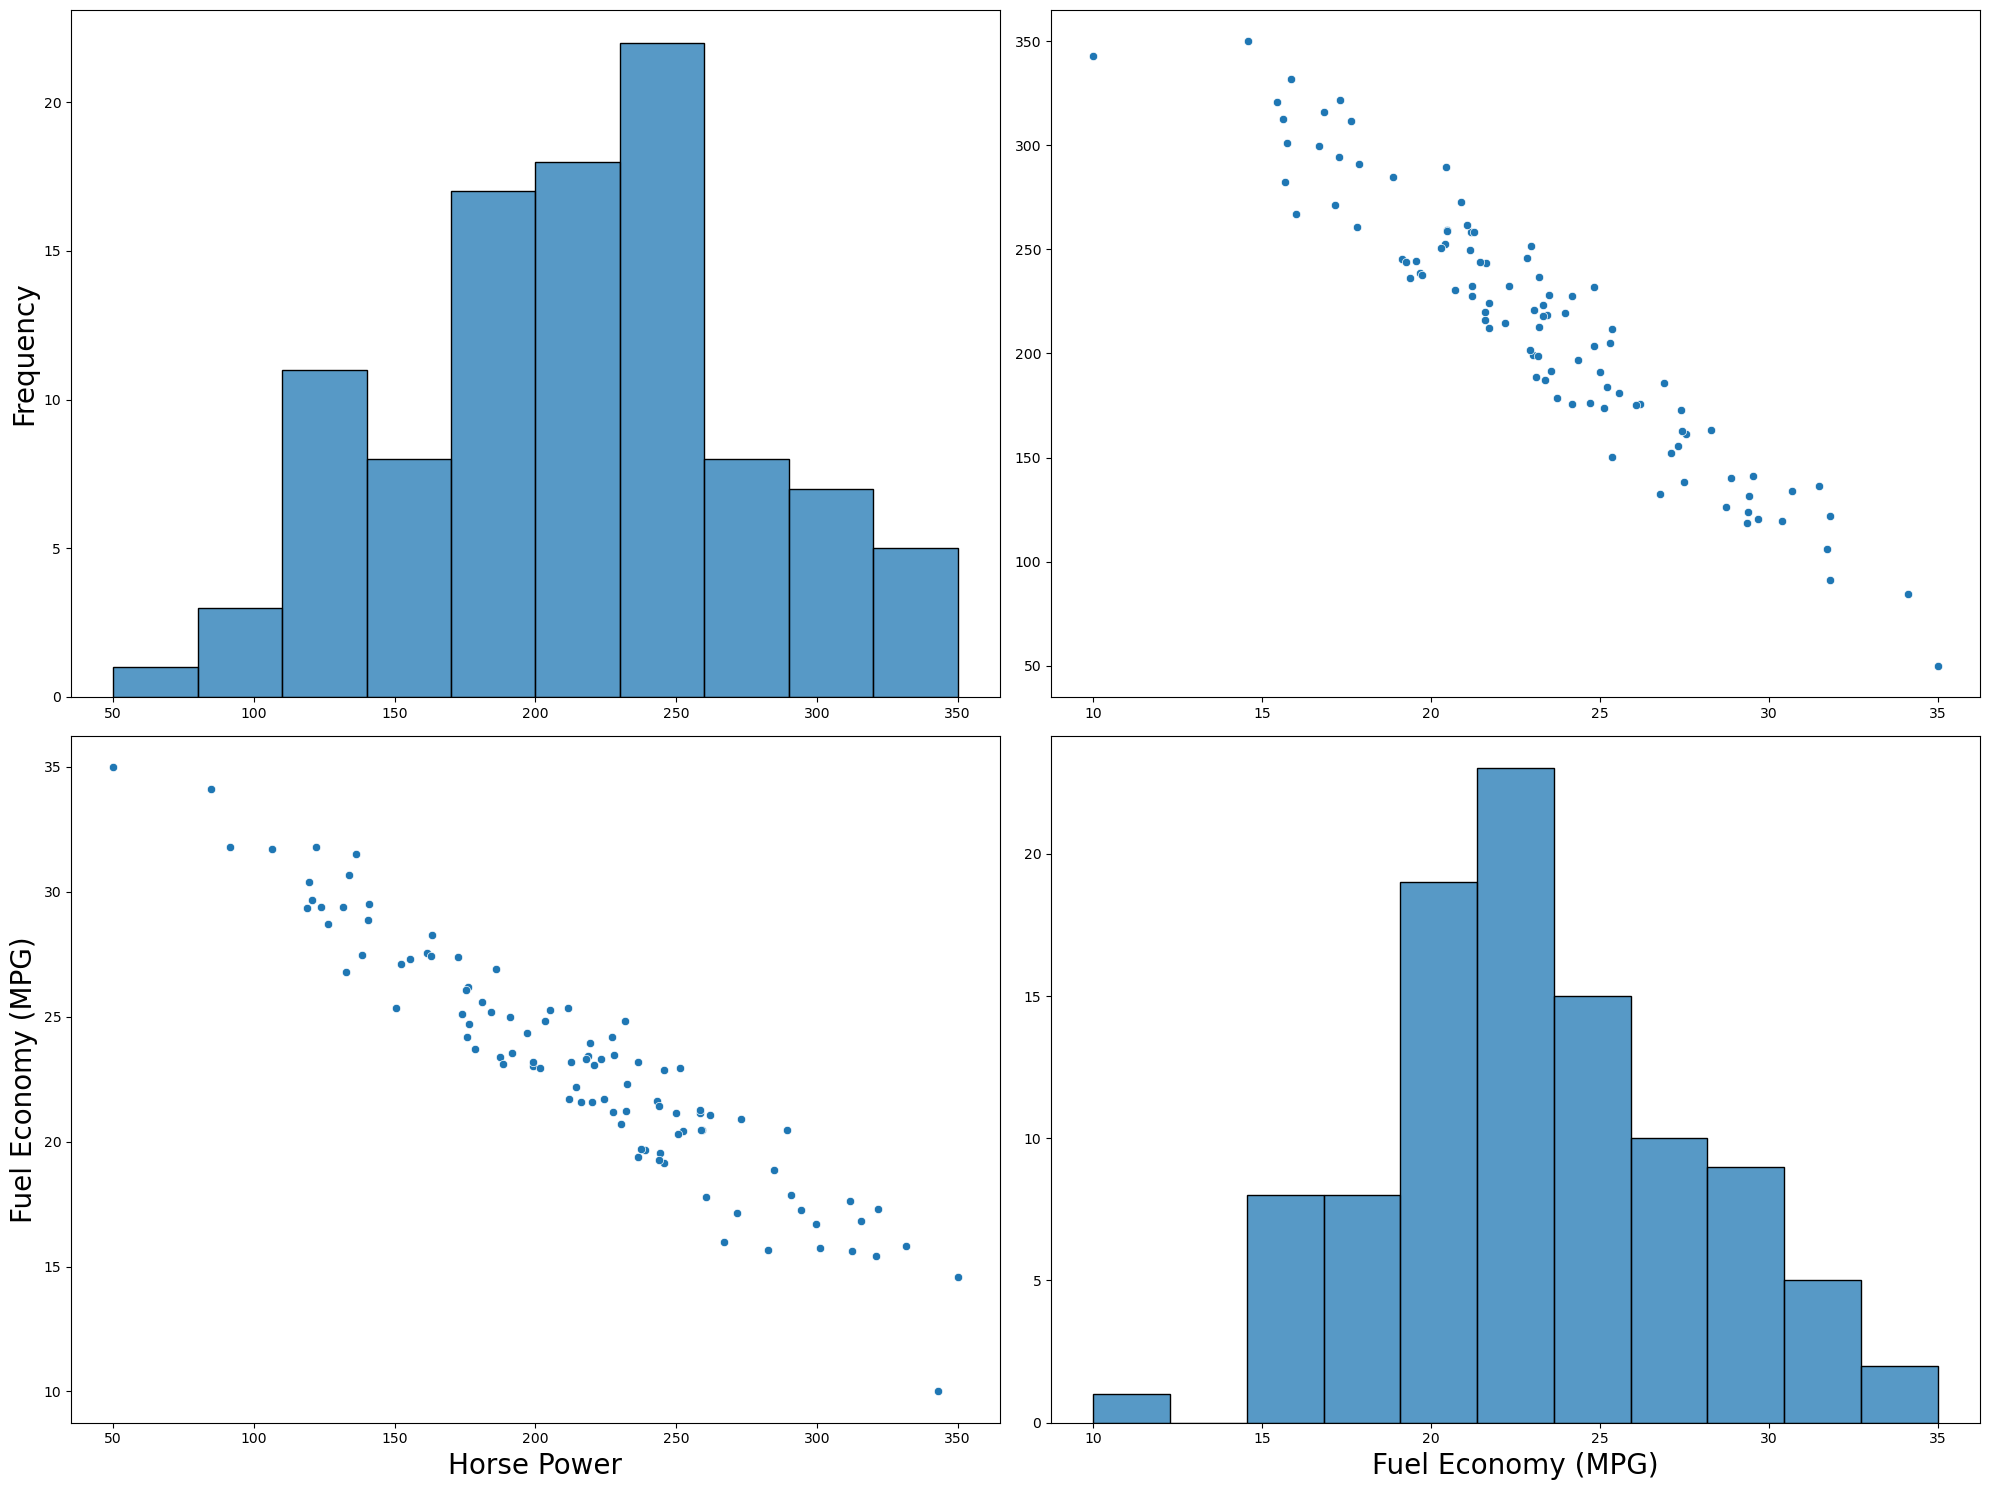

In [34]:
fig, axes = plt.subplots(2,2, figsize = (20, 15))

label_font = {'fontsize': 20}

sns.histplot(df, x='Horse Power', edgecolor='black', ax = axes[0,0])

sns.scatterplot(df, x='Fuel Economy (MPG)', y='Horse Power', ax = axes[0,1])

sns.scatterplot(df, y='Fuel Economy (MPG)', x='Horse Power', ax = axes[1,0])

sns.histplot(df, x='Fuel Economy (MPG)', edgecolor='black', ax = axes[1,1])

for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')

axes[0, 0].set_ylabel('Frequency', fontdict=label_font)
axes[1, 0].set_xlabel('Horse Power', fontdict=label_font)
axes[1, 0].set_ylabel('Fuel Economy (MPG)', fontdict=label_font)
axes[1, 1].set_xlabel('Fuel Economy (MPG)', fontdict=label_font)

plt.tight_layout()

plt.show()


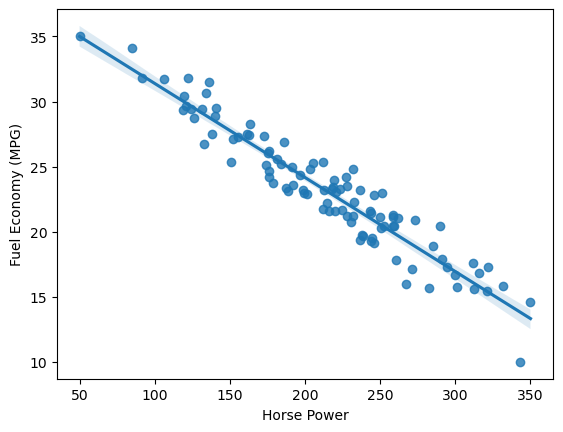

In [37]:
sns.regplot(df, x ='Horse Power', y = 'Fuel Economy (MPG)')

plt.show()

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [41]:
from sklearn.model_selection import train_test_split

x= df[['Horse Power']]
y=df['Fuel Economy (MPG)']

In [42]:
x

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [43]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [52]:
x_test.shape

(25, 1)

# STEP#5: TRAIN THE MODEL

In [53]:
x_train.shape

(75, 1)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
slm = LinearRegression().fit(x_train, y_train)

In [57]:
print('Linear Model Coeff(m)', slm.coef_)
print('Linear Model Coeff(b)', slm.intercept_)

Linear Model Coeff(m) [-0.07187478]
Linear Model Coeff(b) 38.52188875530445


# STEP#6: TEST THE MODEL 

In [60]:
np.array(y_test)

array([16.69336865, 28.88208128, 23.17222305, 19.36733689, 27.41866055,
       21.58264283, 20.40757083, 28.71821022, 31.79661213, 30.67480326,
       20.45016379, 29.67863744, 19.13999943, 31.80670649, 22.96577297,
       22.84971109, 25.34563185, 17.62748039, 17.87326587, 24.18110919,
       19.67409397, 10.        , 25.12965002, 21.05039889, 23.05917995])

In [59]:
slm.predict(x_test)

array([16.99320288, 28.42834709, 24.22180356, 21.5260584 , 26.81991683,
       22.70235122, 20.36974149, 29.45050026, 29.75027896, 28.90338565,
       17.71485834, 29.86211075, 20.87234276, 31.94963986, 20.45080761,
       20.85360102, 27.70428528, 16.11439176, 17.61443515, 22.17899225,
       21.35556851, 13.87557812, 26.02003858, 19.70132585, 22.65761922])

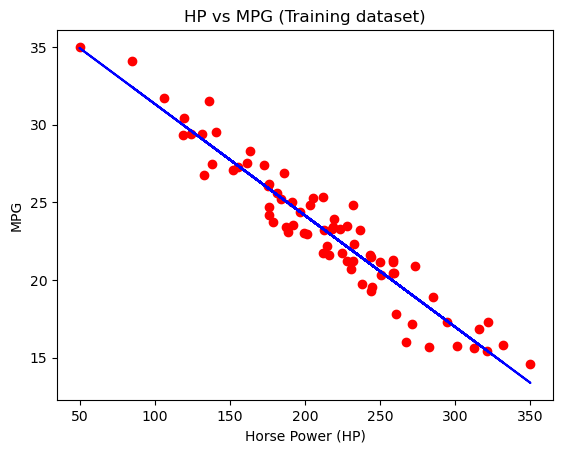

In [64]:
plt.scatter(x_train, y_train, color = 'r')

plt.plot(x_train, slm.predict(x_train), color = 'blue')

plt.title('HP vs MPG (Training dataset)')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')

plt.show()

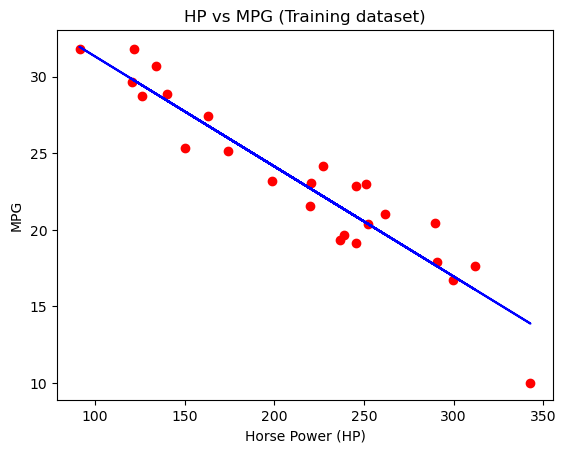

In [65]:
plt.scatter(x_test, y_test, color = 'r')

plt.plot(x_test, slm.predict(x_test), color = 'blue')

plt.title('HP vs MPG (Training dataset)')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')

plt.show()

In [67]:
slm.predict([[300]])

array([16.95945463])